In [ ]:
[0.597, 0.702, 0.728, 0.654] # Baseline
[0.617, 0.721, 0.791, 0.685] # Doc format
[0.669, 0.768, 0.863, 0.742] # keywords

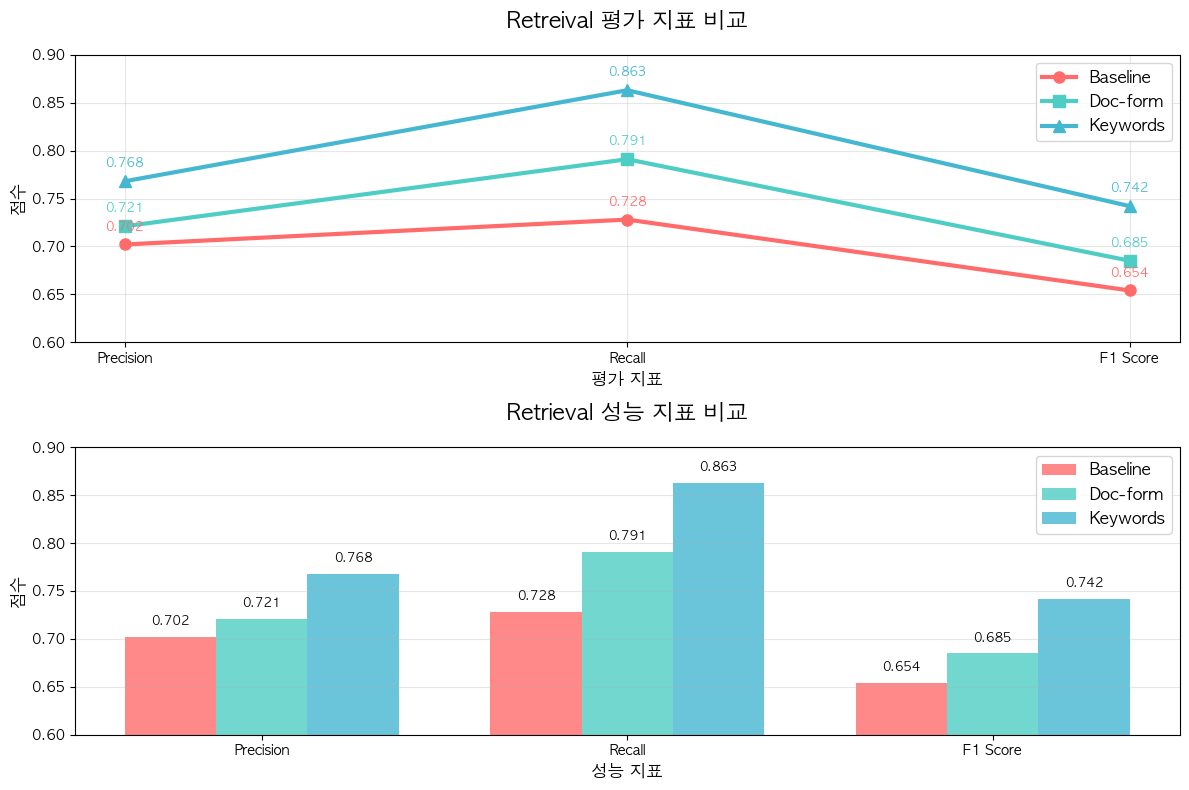

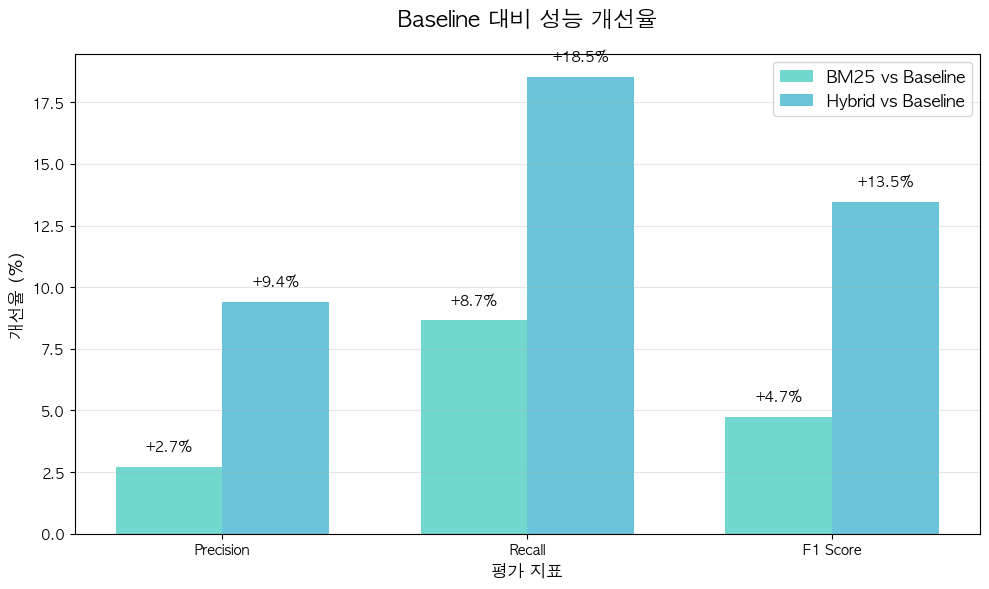

=== 성능 요약 ===
지표           Baseline BM25     Hybrid  
----------------------------------------
Precision    0.702    0.721    0.768   
Recall       0.728    0.791    0.863   
F1 Score     0.654    0.685    0.742   

=== 개선율 (Baseline 대비) ===
지표           BM25       Hybrid    
-----------------------------------
Precision    +2.7      % +9.4      %
Recall       +8.7      % +18.5     %
F1 Score     +4.7      % +13.5     %


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 맥에서 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 맥 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# 데이터 (accuracy 제거)
models = ['Baseline', 'Doc-form', 'Keywords']
metrics = ['Precision', 'Recall', 'F1 Score']

# 각 모델별 성능 데이터 (첫 번째 accuracy 값 제거)
baseline = [0.702, 0.728, 0.654]
bm25 = [0.721, 0.791, 0.685]
hybrid = [0.768, 0.863, 0.742]

data = [baseline, bm25, hybrid]

# 그래프 스타일 설정
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
markers = ['o', 's', '^']

# 1. 선 그래프 (Line Plot)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
x = np.arange(len(metrics))

for i, (model_data, color, marker) in enumerate(zip(data, colors, markers)):
    plt.plot(x, model_data, marker=marker, linewidth=3, markersize=8, 
             color=color, label=models[i])

plt.title('Retreival 평가 지표 비교', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('평가 지표', fontsize=12, fontweight='bold')
plt.ylabel('점수', fontsize=12, fontweight='bold')
plt.xticks(x, metrics)
plt.ylim(0.6, 0.9)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# 각 점에 값 표시
for i, (model_data, color) in enumerate(zip(data, colors)):
    for j, value in enumerate(model_data):
        plt.annotate(f'{value:.3f}', 
                    (j, value), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center',
                    fontsize=9,
                    fontweight='bold',
                    color=color)

# 2. 막대 그래프 (Bar Plot)
plt.subplot(2, 1, 2)
x = np.arange(len(metrics))
width = 0.25

for i, (model_data, color) in enumerate(zip(data, colors)):
    bars = plt.bar(x + i*width, model_data, width, label=models[i], 
                   color=color, alpha=0.8)
    
    # 막대 위에 값 표시
    for bar, value in zip(bars, model_data):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)

plt.title('Retrieval 성능 지표 비교', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('성능 지표', fontsize=12, fontweight='bold')
plt.ylabel('점수', fontsize=12, fontweight='bold')
plt.xticks(x + width, metrics)
plt.ylim(0.6, 0.9)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 3. 개선도를 강조한 별도 그래프
plt.figure(figsize=(10, 6))

#Baseline 모델 대비 개선율 계산
bm25_improvement = [(b - a) / a * 100 for a, b in zip(baseline, bm25)]
hybrid_improvement = [(h - a) / a * 100 for a, h in zip(baseline, hybrid)]

x = np.arange(len(metrics))
width = 0.35

bars1 = plt.bar(x - width/2, bm25_improvement, width, label='BM25 vs Baseline', 
                color='#4ECDC4', alpha=0.8)
bars2 = plt.bar(x + width/2, hybrid_improvement, width, label='Hybrid vs Baseline', 
                color='#45B7D1', alpha=0.8)

# 막대 위에 개선율 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'+{height:.1f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)

plt.title('Baseline 대비 성능 개선율', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('평가 지표', fontsize=12, fontweight='bold')
plt.ylabel('개선율 (%)', fontsize=12, fontweight='bold')
plt.xticks(x, metrics)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 성능 요약 출력
print("=== 성능 요약 ===")
print(f"{'지표':<12} {'Baseline':<8} {'BM25':<8} {'Hybrid':<8}")
print("-" * 40)
for i, metric in enumerate(metrics):
    print(f"{metric:<12} {baseline[i]:<8.3f} {bm25[i]:<8.3f} {hybrid[i]:<8.3f}")

print("\n=== 개선율 (Baseline 대비) ===")
print(f"{'지표':<12} {'BM25':<10} {'Hybrid':<10}")
print("-" * 35)
for i, metric in enumerate(metrics):
    bm25_imp = (bm25[i] - baseline[i]) / baseline[i] * 100
    hybrid_imp = (hybrid[i] - baseline[i]) / baseline[i] * 100
    print(f"{metric:<12} +{bm25_imp:<9.1f}% +{hybrid_imp:<9.1f}%")